# Exercise: Classification End to End

### **Gunakan dataset churn**

**Buatlah machine learning model yang dapat memprediksi siapa saja customers yang akan meninggalkan bank!**

- Tujuannya adalah menentukan apakah seorang customer akan melakukan churn (tidak menggunakan jasa lagi) dari bank ini.

**Dataset overview:**
- It consists of 10000 observations and 12 variables.
- Independent variables contain information about customers.
- Dependent variable refers to customer abandonment.

**Features:**
- Surname: Surname
- CreditScore: Credit score
- Geography: Country (Germany/ France/ Spain)
- Gender: Gender (Female/ Male)
- Age: Age
- Tenure: How many years of customer
- Balance: Balance
- NumOfProducts: The number of bank product used
- HasCrCard: Credit card status (0 = No, 1 = Yes)
- IsActiveMember: Active membership status (0 = No, 1 = Yes)
- EstimatedSalary: Estimated salary
- Exited: Churn or not? (0 = No, 1 = Yes)

**Instructions:**
- Lakukan eksplorasi data. Apa saja insight yang kamu dapat?
- Lakukan data cleaning dan preprocessing yang kamu anggap dibutuhkan untuk dataset ini.
- Tentukan metric yang sesuai dengan case dataset ini. Jelaskan alasan mengapa memilih metric tersebut.
- **Lakukan modeling dengan menggunakan model logistic regression, knn, decision tree, random forest, stacking, voting, adaboost, gradientboost, xgboost**.
- Pilih model terbaik dan lakukan hyperparameter tuning.
- Bandingkan hasil sebelum dan sesudah tuning.
- **Bandingkan cost pada skenario bisnis (menggunakan confusion matrix)**:
    - Sebelum menggunakan ML
    - Setelah menggunakan ML

Diketahui pada bidang perbankang:
- retention cost: $20
- acquisition cost: $100

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Train Test Split
from sklearn.model_selection import train_test_split

# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Impute Missing Values
from sklearn.impute import SimpleImputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# Encoder
from sklearn.preprocessing import OneHotEncoder

# Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# Pipeline & Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Ensemble Models
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Cross-Validation
from sklearn.model_selection import cross_val_score

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Hyperparamter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Save model
import joblib

## 1. Load Dataset

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop(columns= ['RowNumber', 'CustomerId', 'Surname'])

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. EDA

In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include= 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [7]:
# Check missing value
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak ada missing value

In [8]:
# Chek for duplicate
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat

In [9]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

### Explore Numerical Features 

#### Numerical columns distribution

In [10]:
# Create numerical column variable without 'Exited'
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='Exited').columns
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [11]:
# Continoous column
hist_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Discrete column
count_cols = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

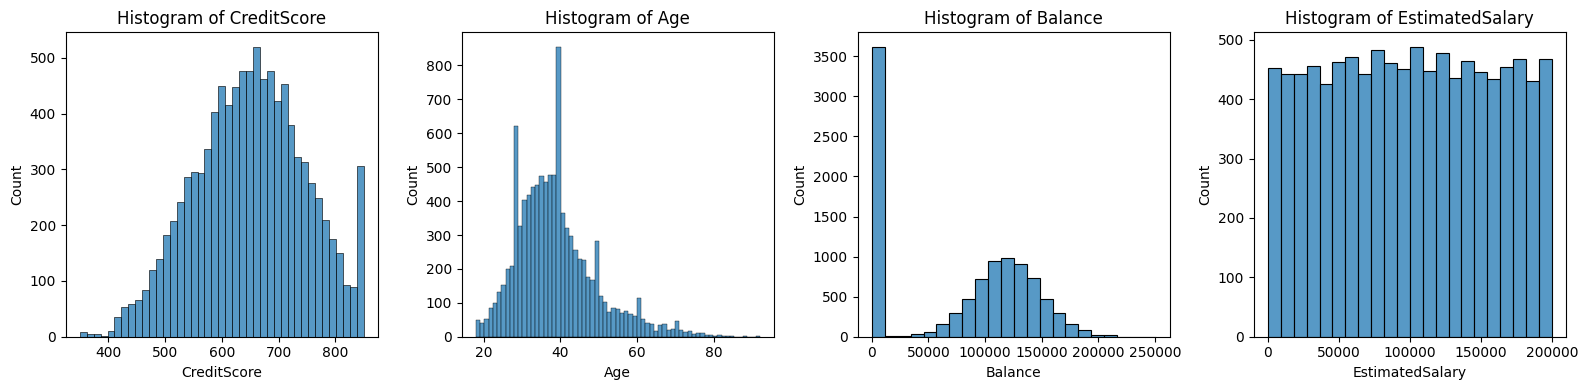

In [12]:
# Histogram for numerical continous columns
plt.figure(figsize=(16, 4))

for i, col in enumerate(hist_cols, 1):
    plt.subplot(1, 4, i)
    sns.histplot(data=df, x=col)
    plt.title(f'Histogram of {col}')

plt.tight_layout()

In [13]:
# Check skewness
hist_skew = {
    'Column' : hist_cols,
    'Skewness' : df[hist_cols].skew().values.round(3)
}

df_hist_skew = pd.DataFrame(hist_skew)
df_hist_skew

,Column,Skewness
0,CreditScore,-0.072
1,Age,1.011
2,Balance,-0.141
3,EstimatedSalary,0.002


**Distribusi Histogram**

1. **CreditScore**
    - Distribusi mendekati normal, namun terlihat sedikit condong ke kiri (left-skewed) karena terdapat banyak data dengan nilai CreditScore tinggi dengan nilai skewness -0.071.
    - Mayoritas data berada di rentang credit score 600-700

2. **Age**
    - Distribusi condong ke kanan (right-skewed).
    - Mayoritas data berada di rentang usia 30-40 tahun. Nasabah berkurang secara signifikan setelah usia 50 tahun. Hal ini mengindikasikan bahwa bank lebih banyak menarik nasabah dalam usia produktif atau nasabah yang lebih tua lebih sedikit melakukan aktivitas perbankan.

3. **Balance**
    - Distribusi hampir simteris, namun terlihat sedikit condong ke kiri (left-skewed) dengan nilai skewness -0.141.
    - Terdapat banyak data nasabah yang memiliki saldo 0 membentuk puncak tajam di awal distrbusi, namun setelah saldo 0, distribusi menyebar cukup merata hinga saldo tinggi.

4. **EstimatedSalary**
    - Distribusi mendekati uniform yang berarti nilai-nilai gaji tersebar hampir merata di seluruh rentang.
    - Tidak ada kelompok gaji yang dominan. Nilai skewness ≈ 0 mendukung bahwa distribusi tidak condong ke kiri maupun kanan.

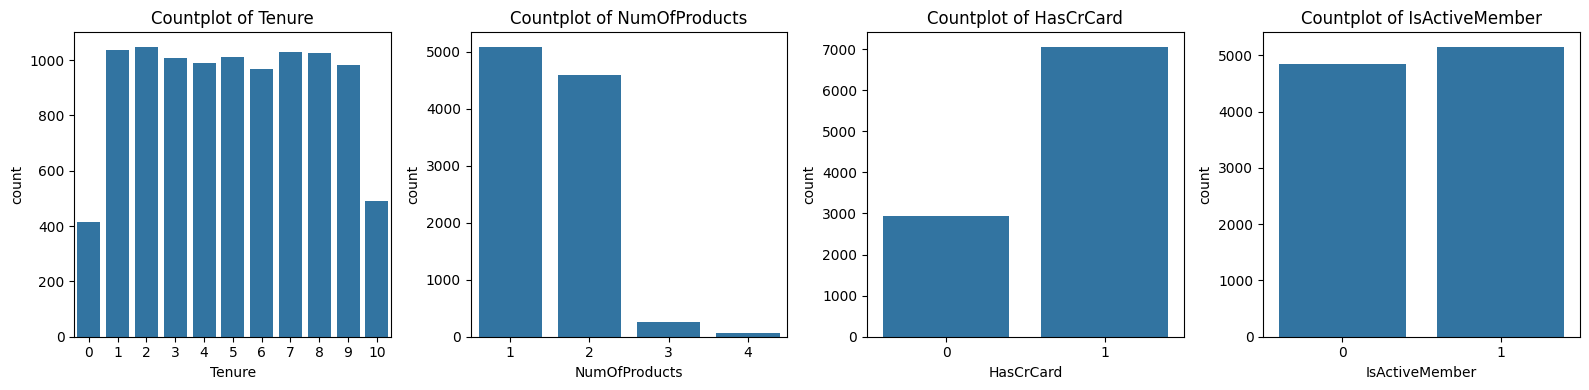

In [14]:
# Countplot for numerical discrete columns
plt.figure(figsize=(16, 4))

for j, col in enumerate(count_cols, 1):  
    plt.subplot(1, 4, j)
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')

plt.tight_layout()

**Countplot**

1. **Tenure**
   - Distribusi cukup merata, tetapi ada sedikit lonjakan pada tahun ke-1 dan ke-9.
   - Tidak menunjukkan pola khusus seperti kecenderungan masa tinggal pendek atau panjang. Bisa diasumsikan bahwa nasabah bergabung dan keluar di berbagai waktu secara acak.

2. **NumOfProducts**
   - Mayoritas nasabah memiliki 1 atau 2 produk bank.
   - Jumlah nasabah yang memiliki lebih dari 2 produk sangat sedikit, terutama untuk 4 produk, yang hampir tidak digunakan. Ini menunjukkan bahwa sebagian besar nasabah belum terlalu aktif dalam memanfaatkan banyak layanan bank.

3. **HasCrCard**
   - Sekitar setengah dari nasabah memiliki kartu kredit.
   - Rasio yang seimbang ini bisa menjadi bahan evaluasi apakah kartu kredit sudah ditawarkan secara optimal kepada nasabah potensial.

4. **IsActiveMember**
   - Jumlah nasabah tidak aktif sedikit lebih banyak dibanding yang aktif.
   - Ini bisa menjadi sinyal bagi bank untuk meningkatkan engagement atau aktivitas nasabah agar meningkatkan loyalitas dan menekan angka churn.


#### Identify outliers

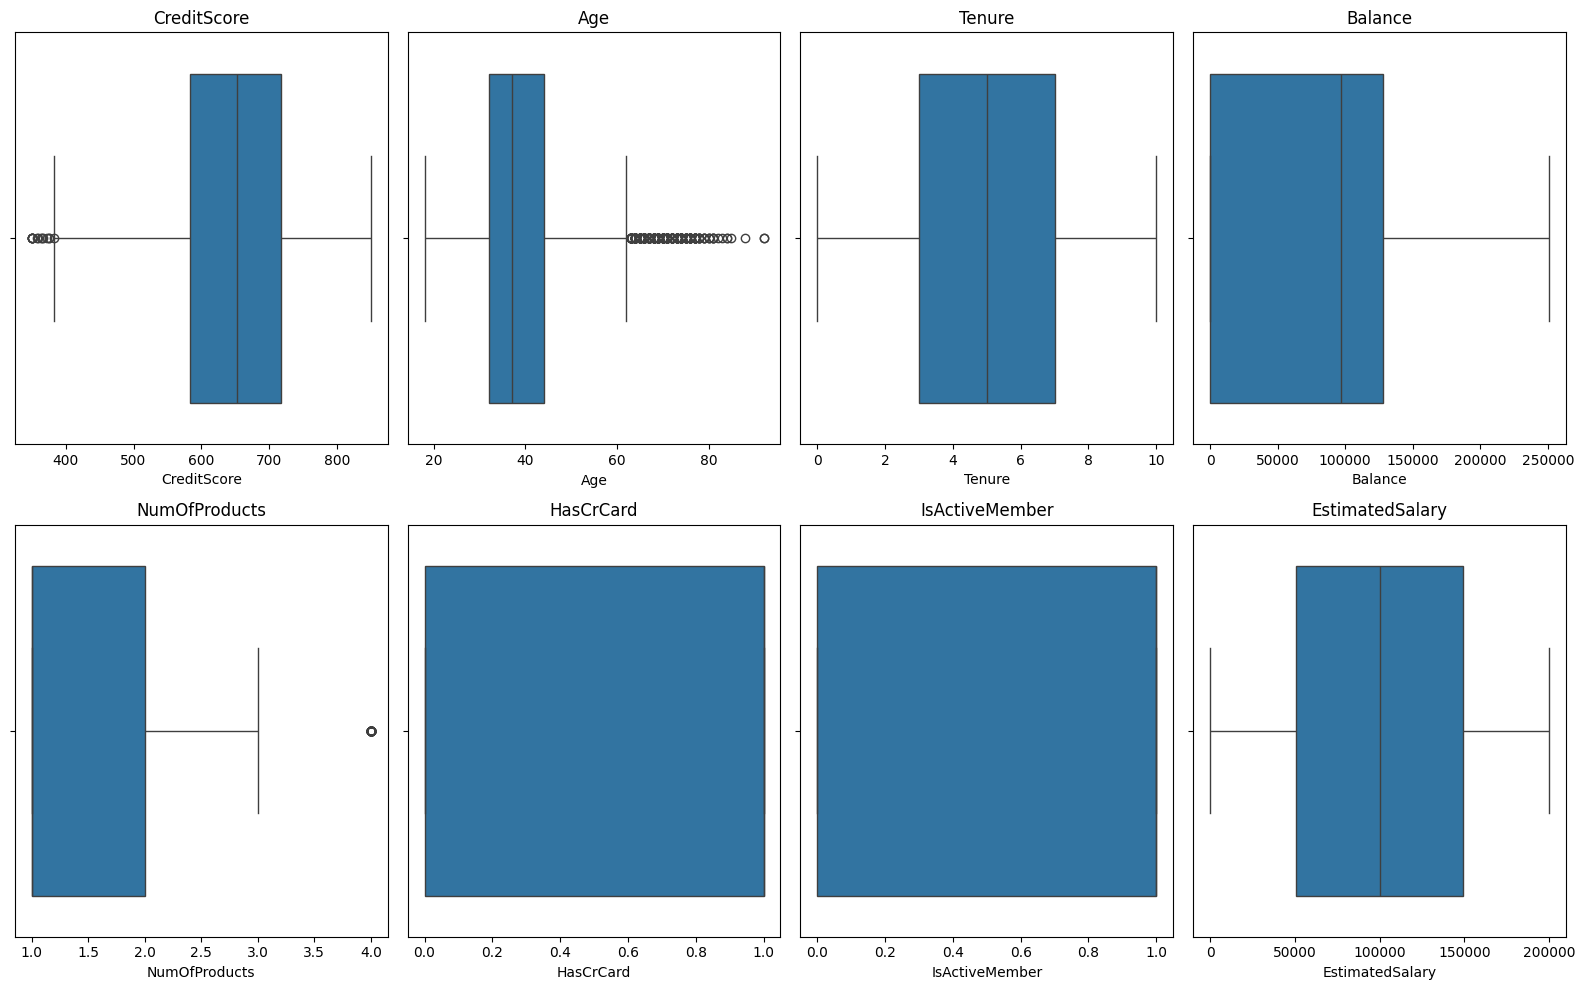

In [15]:
# Boxplot for num_cols
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df, x= col)
    plt.title(col)

plt.tight_layout()

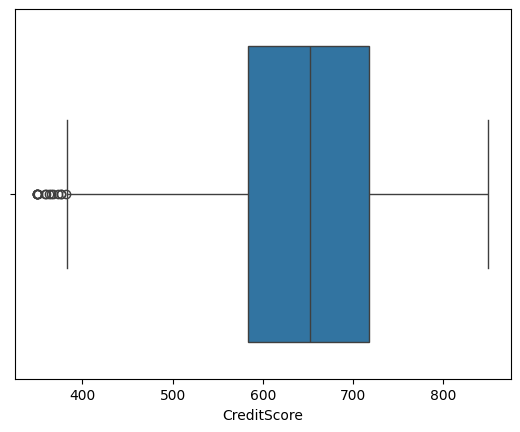

In [16]:
sns.boxplot(df, x= 'CreditScore');

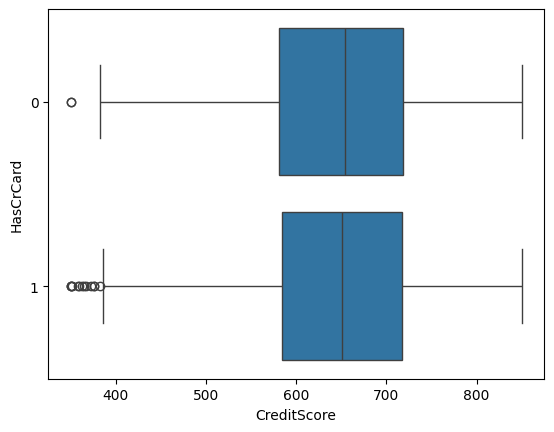

In [17]:
sns.boxplot(df, x= 'CreditScore', y= 'HasCrCard', orient= 'h');

Outlier pada CreditScore tidak ekstrem baik secara global mauapun secara contextual, maka tidak perlu kita drop.

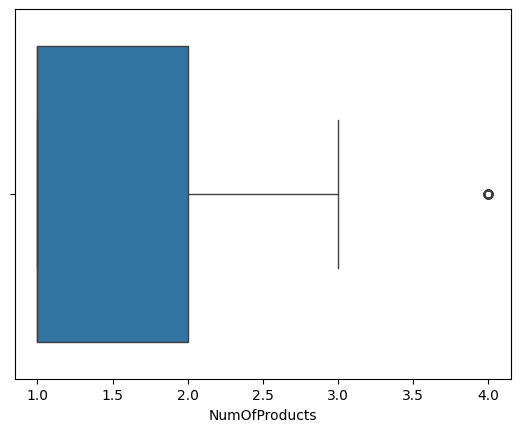

In [18]:
sns.boxplot(df, x= 'NumOfProducts');
# Outlier global

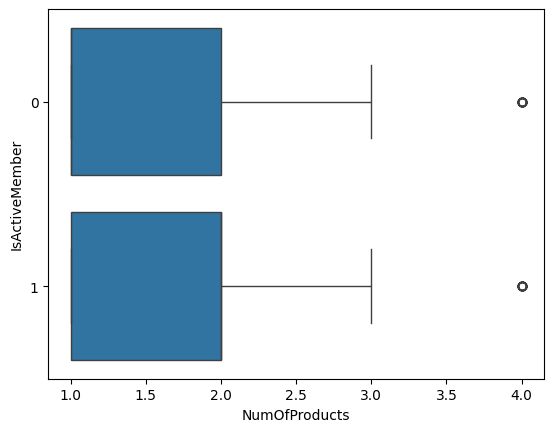

In [19]:
sns.boxplot(df, x= 'NumOfProducts', y= 'IsActiveMember', orient= 'h');
# Outlier Contextual

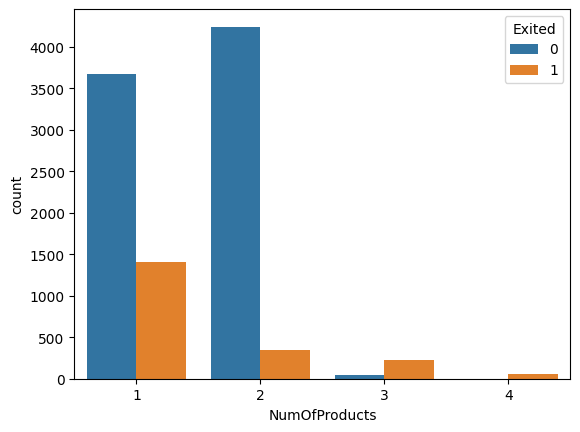

In [20]:
sns.countplot(df, x= 'NumOfProducts', hue= 'Exited');

**Insight**

Dikarenakan imbalance dari proporsi perbandingan, kita hanya dapat menyimpulkan bahwa customer paling loyal ketika memakai 2 produk credit card berbeda

C:\Users\rahma\AppData\Local\Temp\ipykernel_8868\1632675754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_NumOP, x='NumOfProducts', y='Exited', palette='Set1')


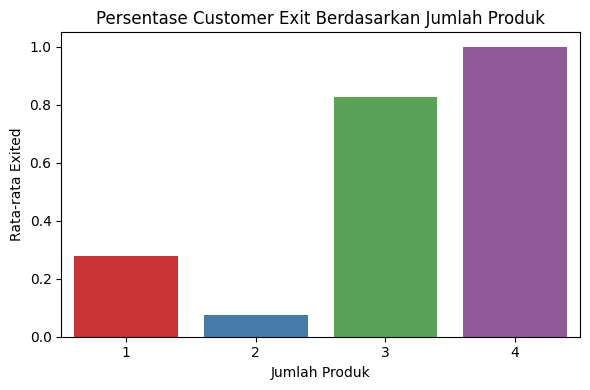

In [21]:
df_NumOP = df.groupby('NumOfProducts')['Exited'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=df_NumOP, x='NumOfProducts', y='Exited', palette='Set1')
plt.title('Persentase Customer Exit Berdasarkan Jumlah Produk')
plt.ylabel('Rata-rata Exited')
plt.xlabel('Jumlah Produk')
plt.tight_layout()

Outlier pada `NumOfProducts`, yaitu 4, tidak didrop karena semua customer dengan jumlah produk 4 teridentifikasi melakukan churn

**Insight**

Semakin banyak seorang customer bank memegang produk bank yang lain, semakin besar kemungkinan customer bank melakukan churn.

#### Numerical features vs Exited

##### Continous and Discrete columns vs Exited

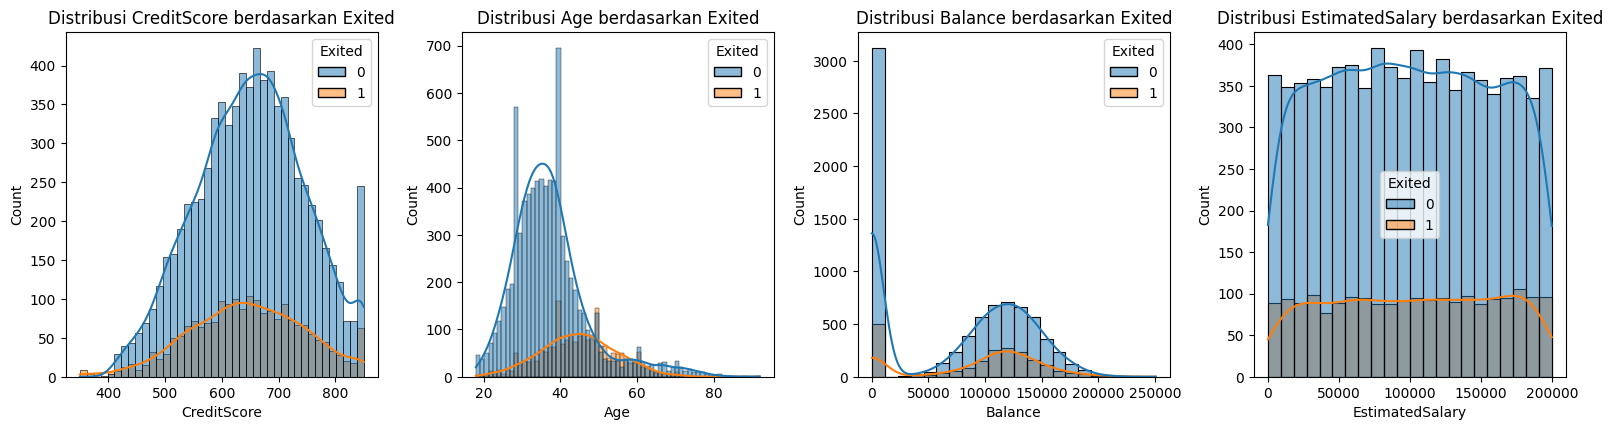

In [22]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(hist_cols, 1):
    plt.subplot(2, 4, i)
    sns.histplot(data=df, x=col, hue='Exited', kde= True)
    plt.title(f'Distribusi {col} berdasarkan Exited')
    
plt.tight_layout()


1. **CreditScore**
- Distribusi CreditScore terlihat relatif normal.
- Tidak ada perbedaan mencolok antara nasabah yang exited dan tidak.

2. **Age**
- Terlihat perbedaan yang jelas antara yang exited dan tidak.
- Nasabah yang exited cenderung memiliki usia lebih tua (di atas 40 tahun).

3. **Balance**
- Sebagian besar nasabah yang tidak exited memiliki saldo mendekati nol.
- Nasabah yang exited lebih banyak ditemukan di kelompok saldo menengah hingga tinggi (50.000 ke atas).

4. **EstimatedSalary**
- Distribusi terlihat merata (mendekati uniform).
- Tidak ada pola jelas antara EstimatedSalary dan status Exited.

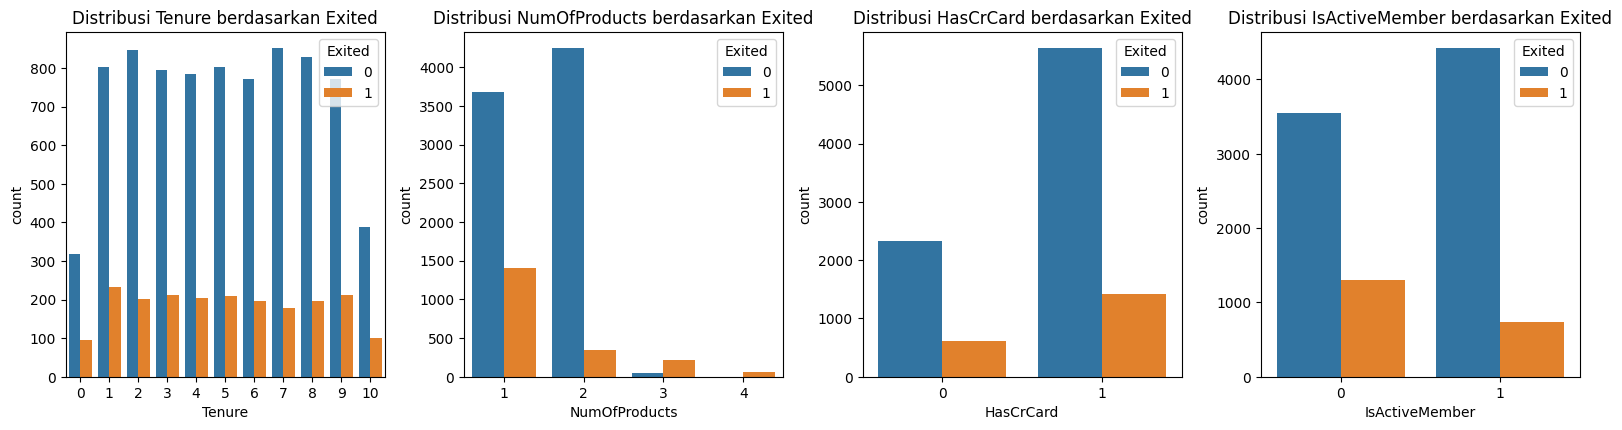

In [23]:
plt.figure(figsize=(16, 8))
for i, col in enumerate(count_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x=col, hue='Exited')
    plt.title(f'Distribusi {col} berdasarkan Exited')
    
plt.tight_layout()

1. **Tenure**
- Tidak ada pola yang jelas antara lama menjadi nasabah (Tenure) dengan Exited.
- Exited tersebar cukup merata di semua tingkat Tenure.

2. **NumOfProducts**
- Nasabah dengan 1 produk memiliki proporsi exited yang cukup tinggi.
- Sebaliknya, nasabah dengan 2 produk sangat jarang yang exited.
- Menunjukkan bahwa meningkatkan jumlah produk dapat meningkatkan retensi.

3. **HasCrCard**
- Tidak ada perbedaan signifikan antara nasabah yang memiliki kartu kredit atau tidak terhadap Exited.

4. **IsActiveMember**
- Nasabah yang tidak aktif (IsActiveMember = 0) memiliki proporsi exited yang jauh lebih tinggi.
- Aktivitas nasabah sangat berpengaruh terhadap retensi.

##### Age vs Balance by Exited

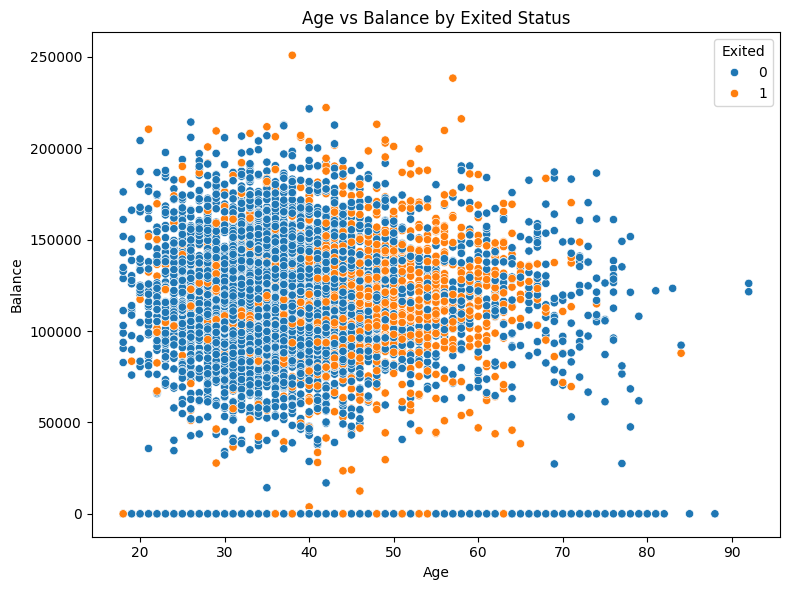

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited')
plt.title('Age vs Balance by Exited Status')
plt.tight_layout()

##### Age vs CreditScore by Exited

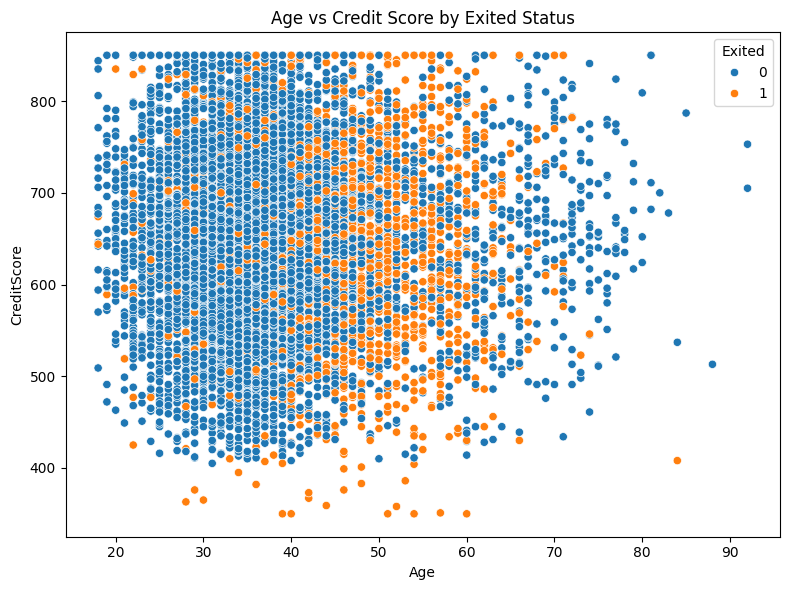

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='CreditScore', hue='Exited')
plt.title('Age vs Credit Score by Exited Status')
plt.tight_layout()


##### EstimatedSalary vs Balance by Exited

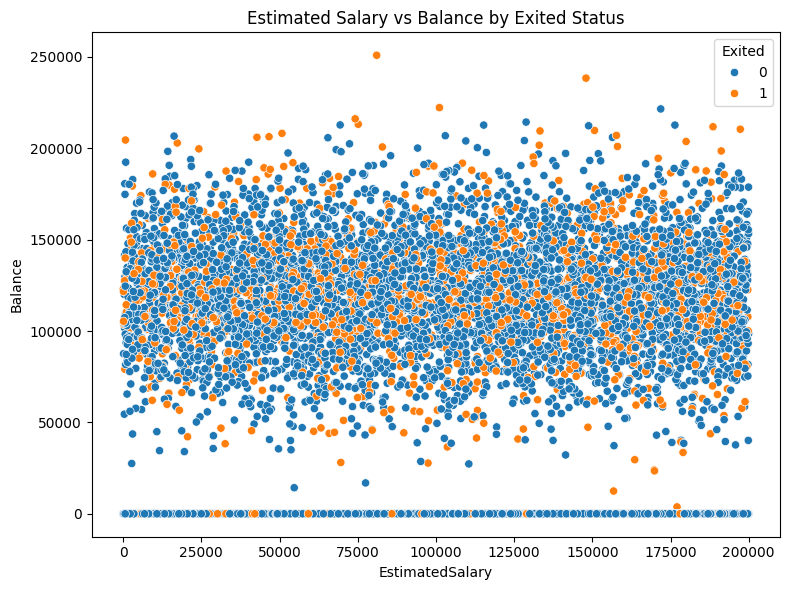

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='EstimatedSalary', y='Balance', hue='Exited')
plt.title('Estimated Salary vs Balance by Exited Status')
plt.tight_layout()

**Scatterplot Analysis terhadap Target Exited**

1. **Age vs Balance**
- Mayoritas nasabah yang tidak keluar (Exited = 0) tersebar pada usia 30–50 tahun dengan saldo yang bervariasi, termasuk nol.
- Nasabah yang keluar (Exited = 1) cenderung berada pada usia yang lebih tua (sekitar 40–60 tahun) dan memiliki saldo yang cukup besar.
- Hal ini menunjukkan bahwa nasabah yang lebih tua dengan saldo besar lebih berisiko untuk berhenti menjadi nasabah.

2. **Age vs Credit Score**
- Tidak terlihat korelasi kuat antara *CreditScore* dan *Age*.
- Namun, nasabah yang keluar (Exited = 1) lebih banyak ditemukan pada usia di atas 40 tahun, terlepas dari skor kreditnya.

3. **Estimated Salary vs Balance**
- Distribusi nasabah terhadap EstimatedSalary dan Balance cukup tersebar dan acak, tidak menunjukkan pola hubungan linier atau klaster khusus.
- Namun, nasabah dengan Balance = 0 didominasi oleh mereka yang tidak keluar (Exited = 0), yang mengindikasikan bahwa tidak semua nasabah aktif memanfaatkan saldo mereka.
- Nasabah yang keluar cenderung memiliki Balance yang tinggi, meskipun EstimatedSalary* mereka bervariasi.


#### Categorical features vs Exited

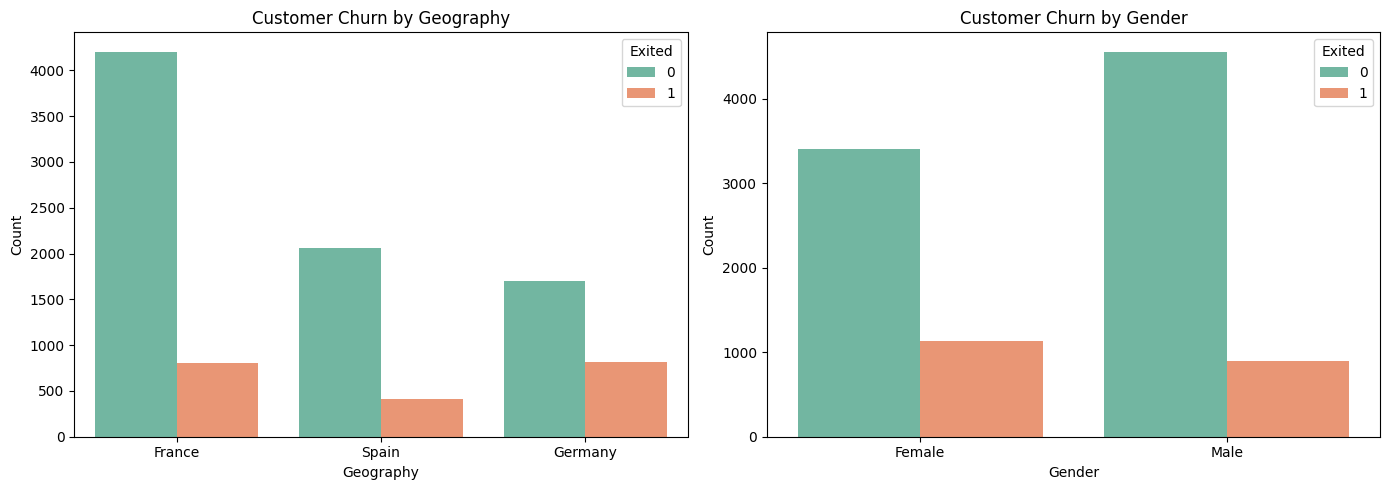

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Countplot Geography vs Exited
sns.countplot(data=df, x='Geography', hue='Exited', palette='Set2', ax=axes[0])
axes[0].set_title('Customer Churn by Geography')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Geography')

# Countplot Gender vs Exited
sns.countplot(data=df, x='Gender', hue='Exited', palette='Set2', ax=axes[1])
axes[1].set_title('Customer Churn by Gender')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Gender')

plt.tight_layout()

**Analisis Fitur Kategorikal terhadap Customer Churn (Exited)**

1. **Geography vs Exited**

- France merupakan negara dengan jumlah nasabah terbanyak, dan memiliki tingkat churn paling rendah secara proporsi.
- Germany terlihat memiliki rasio churn yang tinggi dibandingkan total nasabahnya, walaupun secara jumlah total lebih sedikit dari France dan Spain.
- Spain memiliki jumlah churn yang rendah baik secara absolut maupun proporsi.

    Insight: Pelanggan dari Germany lebih berisiko untuk churn. 

2. **Gender vs Exited**

- Jumlah nasabah laki-laki (Male) lebih banyak dibandingkan perempuan (Female).
- Namun, perempuan memiliki proporsi churn lebih tinggi dibanding laki-laki.

    Insight: Gender juga menunjukkan pengaruh terhadap churn, dengan perempuan cenderung lebih tinggi tingkat churn-nya dibanding laki-laki.

#### Correlation Heatmap

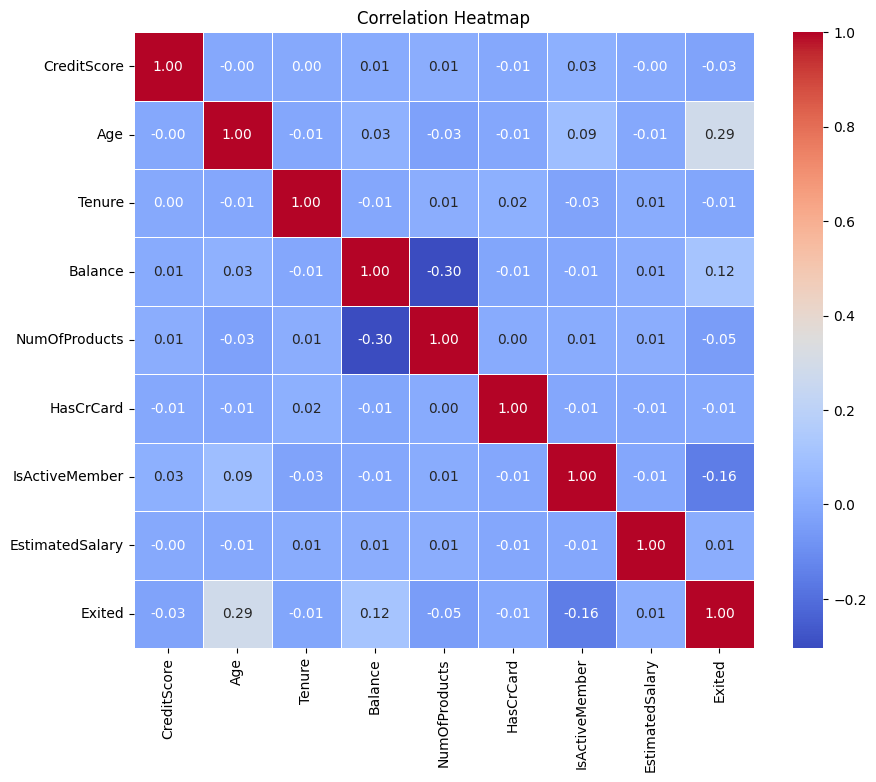

In [28]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only= True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Korelasi yang perlu diperhatikan:

- Age dengan Exited: 0.29 (positif). Semakin tua usia nasabah, semakin cenderung untuk keluar (churn).

- NumOfProducts dengan Balance : -0.30 (negatif). Semakin banyak jumlah produk yang dimiliki nasabah, saldo cenderung lebih sedikit.

## 3. Define Feature (X) & Target (y)

In [29]:
X = df.drop(columns= 'Exited')
y = df['Exited']

## 4. Data Splitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Confusion Matrix Before ML

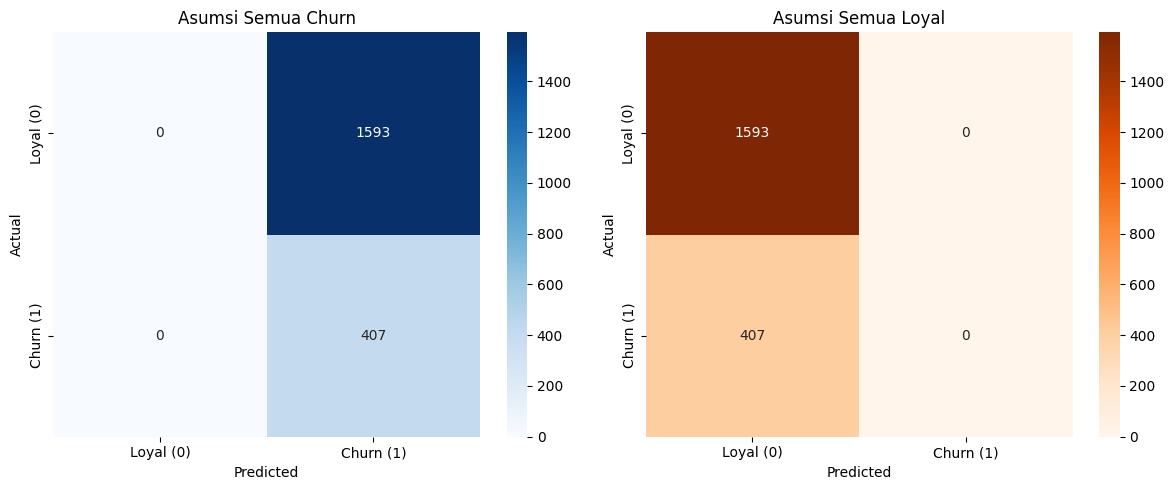

In [31]:
# Prediksi dummy
pred_all_churn = np.full_like(y_test, fill_value=1)   # semua dianggap churn
pred_all_loyal = np.full_like(y_test, fill_value=0)   # semua dianggap loyal

# Confusion matrix
matrix_churn = confusion_matrix(y_test, pred_all_churn)
matrix_loyal = confusion_matrix(y_test, pred_all_loyal)

# Plot side by side
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

# Case 1: Semua churn
sns.heatmap(matrix_churn, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Loyal (0)', 'Churn (1)'],
            yticklabels=['Loyal (0)', 'Churn (1)'],
            ax=ax[0])
ax[0].set(title="Asumsi Semua Churn", xlabel="Predicted", ylabel="Actual")

# Case 2: Semua loyal
sns.heatmap(matrix_loyal, annot=True, cmap="Oranges", fmt="d",
            xticklabels=['Loyal (0)', 'Churn (1)'],
            yticklabels=['Loyal (0)', 'Churn (1)'],
            ax=ax[1])
ax[1].set(title="Asumsi Semua Loyal", xlabel="Predicted", ylabel="Actual")

plt.tight_layout()
plt.show()

Skenario: Aggressive Retention (memprioritaskan recall sehingga sedikit banyak memprediksi churn)

- Hitungan biaya:
    - Retention cost = (TP + FP) × $20 = (346 + 519) × $20 = 865 × $20 = $17,300
    - Acquisition cost = FN × $100 = 61 × $100 = $6,100
    - Total biaya = $17,300 + $6,100 = $23,400

- Perkiraan metrik (untuk konteks F1):
    - Precision ≈ 346 / 865 ≈ 0.40
    - Recall ≈ 346 / 407 ≈ 0.85
    - F1 ≈ 2·(0.40·0.85)/(0.40+0.85) ≈ 0.54

Alasan pemilihan F1-Score:
- F1 menyeimbangkan precision & recall. Di skenario ini kita sengaja naikkan recall (mengurangi FN yang mahal) sehingga F1 tetap berada di kisaran wajar (~0.54) meskipun precision turun.
- Dibandingkan dua ekstrem:
    - Semua churn → total cost $159,300 (sangat mahal karena retention semua loyal)
    - Semua loyal → total cost $8,140 (tampak murah tapi perusahaan kehilangan banyak pelanggan → risiko jangka panjang)
    - Aggressive Retention (ini) → $23,400, kompromi yang masuk akal jika perusahaan lebih ingin menekan kehilangan pelanggan (FN) sambil masih memantau efisiensi retention.

## 5. Preprocessing

Encoding:
- OneHot: Gender, Geography

Scaling:
- Robust: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary 

In [32]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [33]:
preprocessor = ColumnTransformer([
    ('Robust_Scaler', RobustScaler(), num_cols),
    ('OneHot_Encoder', OneHotEncoder(drop= 'first'), ['Gender', 'Geography'])
], remainder= 'passthrough')

preprocessor

,transformers,"[('Robust_Scaler', ...), ('OneHot_Encoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"


In [34]:
preprocessor
preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

## 6. Cross Validation

In [35]:
# Base Model
log_reg = LogisticRegression(max_iter=1000, random_state=0)
knn_clf = KNeighborsClassifier()
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)

In [36]:
# Ensemble: Voting
vote_clf = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('knn', knn_clf),
    ('dt', dtree)
])

# Ensemble: Stacking
stack_clf = StackingClassifier(
    estimators=[
        ('lr', log_reg),
        ('knn', knn_clf),
        ('dt', dtree)
    ],
    final_estimator=log_reg
)

In [37]:
# Bagging
bag_clf = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=3),
    random_state=0
)

# Tree-based ensembles
rf_clf = RandomForestClassifier(random_state=0)
ada_clf = AdaBoostClassifier(random_state=0)
gb_clf = GradientBoostingClassifier(random_state=0)
xgb_clf = XGBClassifier(random_state=0)

In [38]:
# Kumpulan model
models_list = [
    log_reg, knn_clf, dtree,
    vote_clf, stack_clf, bag_clf,
    rf_clf, ada_clf, gb_clf, xgb_clf
]

# Simpan hasil evaluasi
scores_mean, scores_std, scores_all = [], [], []

for model in models_list:
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    
    scores = cross_val_score(
        pipe, X_train, y_train,
        cv=5, scoring='f1',
        error_score='raise'
    )
    
    scores_mean.append(scores.mean())
    scores_std.append(scores.std())
    scores_all.append(scores.round(4))


In [39]:
# Buat DataFrame hasil
cv_results = pd.DataFrame({
    'model': [str(m) for m in models_list],
    'f1_mean': scores_mean,
    'f1_std': scores_std,
    'cv_scores': scores_all
})

cv_results

,model,f1_mean,f1_std,cv_scores
0,"LogisticRegression(max_iter=1000, random_state=0)",0.311546,0.015831,"[0.293, 0.3241, 0.2941, 0.3326, 0.3139]"
1,KNeighborsClassifier(),0.486799,0.026530,"[0.4971, 0.4892, 0.463, 0.5296, 0.4551]"
2,"DecisionTreeClassifier(max_depth=4, random_sta...",0.517595,0.022237,"[0.5072, 0.5451, 0.5031, 0.5427, 0.4899]"
3,"VotingClassifier(estimators=[('lr',\n ...",0.455759,0.029528,"[0.4424, 0.4708, 0.444, 0.5042, 0.4174]"
4,"StackingClassifier(estimators=[('lr',\n ...",0.536169,0.012873,"[0.5274, 0.531, 0.549, 0.5534, 0.52]"
5,BaggingClassifier(estimator=KNeighborsClassifi...,0.485465,0.023060,"[0.4697, 0.4936, 0.4926, 0.5196, 0.4519]"
6,RandomForestClassifier(random_state=0),0.582605,0.013926,"[0.5597, 0.6027, 0.5838, 0.5878, 0.579]"
7,AdaBoostClassifier(random_state=0),0.554935,0.022431,"[0.56, 0.5494, 0.5925, 0.5499, 0.5229]"
8,GradientBoostingClassifier(random_state=0),0.596918,0.015779,"[0.5786, 0.6098, 0.6071, 0.6122, 0.5768]"
9,"XGBClassifier(base_score=None, booster=None, c...",0.586639,0.011991,"[0.576, 0.5745, 0.6059, 0.5949, 0.582]"


Ringkasan Hasil

- Model klasik (Logistic Regression, KNN, Decision Tree)
    - Logistic Regression → Akurasi rendah (0.31) → underfitting.
    - KNN → lebih baik (0.49), tapi masih fluktuatif (std relatif tinggi).
    - Decision Tree (depth=4) → lebih stabil (0.52).
- Model ensemble sederhana (Voting, Stacking, Bagging)
    - Voting → performa justru menurun (0.45), kemungkinan kombinasi model tidak sinkron.
    - Stacking → lebih baik (0.54), artinya stacking bisa menangkap kombinasi antar model.
    - Bagging KNN → hampir sama dengan KNN tunggal (0.48), berarti KNN kurang cocok jadi base learner.
    - Model ensemble berbasis boosting & forest
    - Random Forest → solid (0.58) dengan stabilitas baik.
    - AdaBoost → cukup baik (0.55), tapi lebih variatif.
    - Gradient Boosting → paling tinggi (0.60) dengan stabilitas cukup baik.
    - XGBoost → mirip Gradient Boosting (0.59) namun sedikit lebih stabil.

Insight Sederhana

1. Model klasik kurang efektif → Logistic Regression dan KNN performanya jauh di bawah ensemble.
2. Voting tidak membantu → mungkin karena ada model lemah yang mendominasi hasil voting.
3. Stacking memberi peningkatan kecil dibanding base learner, berarti masih ada potensi jika base learner lebih beragam/kuat.
4. Ensemble berbasis tree (Random Forest, Gradient Boost, XGBoost) jelas outperform model lain → cocok jadi pilihan utama.
5. Gradient Boosting adalah juara di dataset ini, diikuti XGBoost dan Random Forest.

## 7. Hyperparameter Tuning

In [ ]:
# Hyperparameter candidates for Gradient Boosting
gb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.8, 1.0],
    'model__max_features': ['sqrt', 'log2', None]
}

# Build pipeline: preprocessing + model
gb_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', GradientBoostingClassifier(random_state=0))
])

# Grid Search with cross-validation
gb_search = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_param_grid,
    cv=5,
    scoring="f1_macro",   
    n_jobs=-1
)

In [41]:
gb_search.fit(X_train, y_train)

,estimator,Pipeline(step...om_state=0))])
,param_grid,"{'model__learning_rate': [0.01, 0.1, ...], 'model__max_depth': [3, 5, ...], 'model__max_features': ['sqrt', 'log2', ...], 'model__min_samples_leaf': [1, 2, ...], ...}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('Robust_Scaler', ...), ('OneHot_Encoder', ...)]"


In [42]:
gb_search.best_score_

np.float64(0.7624388028646021)

In [43]:
gb_search.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'model__subsample': 0.8}

## 8. Predict to Test Set

Before Tuning

In [44]:
default_gb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', GradientBoostingClassifier(random_state=0))
])

# Fit ke training set
default_gb.fit(X_train, y_train)

# Prediksi ke test set
y_pred_default = default_gb.predict(X_test)

print("=== Default Gradient Boosting ===")
print("F1 Score (default):", f1_score(y_test, y_pred_default, average="macro"))

=== Default Gradient Boosting ===
F1 Score (default): 0.7359339668138487


After Tuning

In [45]:
# Ambil model terbaik
best_gb = gb_search.best_estimator_

# Prediksi ke test set
y_pred_best = best_gb.predict(X_test)

print("\n=== Tuned Gradient Boosting ===")
print("Best Params:", gb_search.best_params_)
print("F1 Score (tuned):", f1_score(y_test, y_pred_best, average="macro"))


=== Tuned Gradient Boosting ===
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100, 'model__subsample': 0.8}
F1 Score (tuned): 0.7466052289179144


Insight:
- Default Gradient Boosting mendapat F1 = 0.736, sedangkan Tuned Gradient Boosting meningkat menjadi F1 = 0.747.
- Artinya ada peningkatan performa sekitar 1% setelah dilakukan tuning.
- Parameter hasil tuning (learning rate 0.1, max depth 5, subsample 0.8, dan max features "sqrt") membuat model lebih seimbang antara menangkap pola data dan mencegah overfitting.
- Walaupun peningkatannya tidak besar, model hasil tuning lebih optimal dan lebih dapat diandalkan untuk memprediksi churn.

### Confusion Matrix After ML

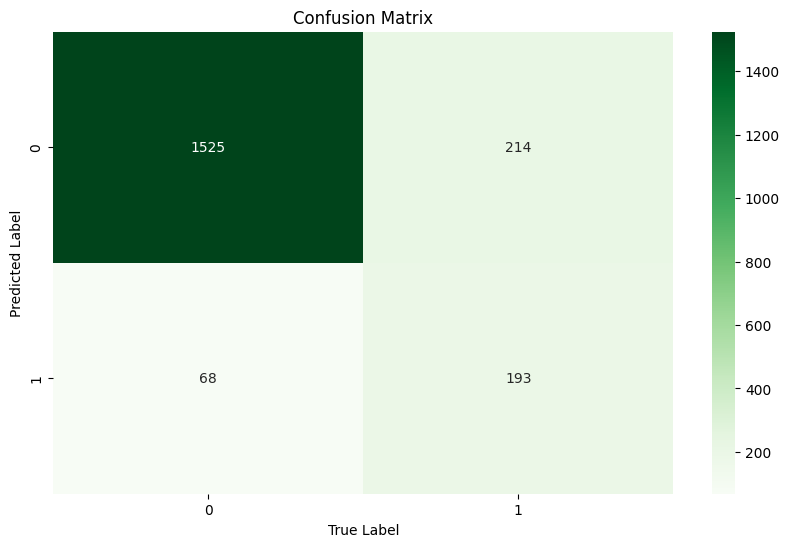

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_pred_best, y_test), annot=True, fmt='d', cmap='Greens')
plt.ylabel("Predicted Label")
plt.xlabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Hitungan biaya (model setelah tuning):
- Prediksi churn (TP + FP) = 193 + 214 = 407 → Retention cost = 407 × $20 = $8,140
- Missed churn (FN) = 68 → Acquisition cost = 68 × $100 = $6,800
- Total biaya (tuned) = $8,140 + $6,800 = $14,940

Perbandingan singkat dengan skenario awal:
- Aggressive Retention (sebelumnya) → $23,400
- Semua diasumsikan churn (ekstrem) → $159,300 (sangat mahal karena retensi untuk semua loyal)
- Semua diasumsikan loyal (ekstrem) → $8,140 (murah secara immediate, tetapi berisiko kehilangan pelanggan)

Model hasil tuning menimbulkan total biaya $14,940 — lebih efisien dibanding strategi agresif yang menekan FN lebih jauh ($23,400), tetapi biaya masih di atas skenario “semua loyal” ($8,140) yang berisiko.

Pilihan akhir tergantung tujuan bisnis: meminimalkan biaya jangka pendek (semua loyal tampak murah) vs meminimalkan kehilangan pelanggan jangka panjang (tuned model atau strategi yang menurunkan FN).

## Save Model

In [50]:
joblib.dump(best_gb, "best_gb_model.joblib")
print("Final model saved as best_gb_model.joblib")

Final model saved as best_gb_model.joblib
